In [37]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

In [21]:
data = np.loadtxt('random_circuit_MPS_DM_test.csv', delimiter=',')
data[1]

array([0.  , 0.26, 0.41, 0.52, 0.57, 0.6 , 0.64, 0.68, 0.7 , 0.72, 0.75,
       0.76, 0.78, 0.81, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.85, 0.87,
       0.88, 0.88, 0.88, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.96, 0.96, 0.96, 0.96, 0.96, 0.97, 0.97, 0.97,
       0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
       0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
       0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
       0.99])

In [33]:
def porter_thomas2(x, N):
    return N*np.exp(-N*x)

def porter_thomas(x, N):
    return 1 - (1 - x)**(2**N -1)

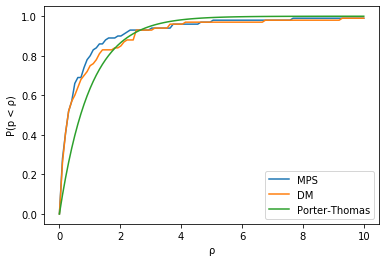

In [36]:
N = 12
N_sample = len(data[1])

x_prob = np.linspace(0, 10, N_sample)
PT_prob = porter_thomas(2**(-N)*x_prob, N)
#PT_prob = porter_thomas(x_prob, N)
plt.plot(x_prob, data[0], label="MPS")
plt.plot(x_prob, data[1], label="DM")
plt.plot(x_prob, PT_prob, label="Porter-Thomas")
plt.xlabel("ρ")
plt.ylabel("P(p < ρ)")
plt.legend()
plt.show()

In [44]:
res = stats.ks_2samp(data[0], data[1])
res = stats.ks_2samp(data[1], PT_prob)
pvalue = res.pvalue # if larger than 0.05, conclude same distribution
pvalue

1.0245697148897385e-13